## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:200%; text-align:center; border-radius:10px 10px;">The Capstone Project of Data Analytics Module</p>

## <p style="background-color:#FDFEFE; font-family:newtimeroman; color:#060108; font-size:150%; text-align:center; border-radius:10px 10px;">Car Price Prediction EDA</p>

## Introduction
Welcome to "***AutoScout Data Analysis Project***". This is the capstone project of ***Data Analysis*** Module. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will have the opportunity to apply many commonly used algorithms for Data Cleaning and Exploratory Data Analysis by using many Python libraries such as Numpy, Pandas, Matplotlib, Seaborn, Scipy you will analyze clean dataset.

### Some Reminders on Exploratory data analysis (EDA)

Exploratory data analysis (EDA) is an especially important activity in the routine of a data analyst or scientist. It enables an in depth understanding of the dataset, define or discard hypotheses and create predictive models on a solid basis. It uses data manipulation techniques and several statistical tools to describe and understand the relationship between variables and how these can impact business. By means of EDA, we can obtain meaningful insights that can impact analysis under the following questions (If a checklist is good enough for pilots to use every flight, it’s good enough for data scientists to use with every dataset).
1. What question are you trying to solve (or prove wrong)?
2. What kind of data do you have?
3. What’s missing from the data?
4. Where are the outliers?
5. How can you add, change or remove features to get more out of your data?

**``Exploratory data analysis (EDA)``** is often an **iterative brainstorming process** where you pose a question, review the data, and develop further questions to investigate before beginning model development work. The image below shows how the brainstorming phase is connected with that of understanding the variables and how this in turn is connected again with the brainstorming phase.<br>

<img src=https://i.ibb.co/k0MC950/EDA-Process.png width="300" height="100">

[Image Credit: Andrew D.](https://towardsdatascience.com/exploratory-data-analysis-in-python-a-step-by-step-process-d0dfa6bf94ee) 

**``In this context, the project consists of 3 parts in general:``**
* **The first part** is related to 'Data Cleaning'. It deals with Incorrect Headers, Incorrect Format, Anomalies, and Dropping useless columns.
* **The second part** is related to 'Filling Data', in other words 'Imputation'. It deals with Missing Values. Categorical to numeric transformation is done as well.
* **The third part** is related to 'Handling Outliers of Data' via Visualization libraries. So, some insights will be extracted.

**``NOTE:``**  However, you are free to create your own style. You do NOT have to stick to the steps above. We, the DA & DV instructors, recommend you study each part separately to create a source notebook for each part title for your further studies.

# AutoScout - Part 1 - ( `Data Cleaning` )

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10,6)

sns.set_style("whitegrid")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_json("scout_car.json", lines=True)

In [3]:
df.head()

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
0,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.4 TDI S-tronic Xenon Navi Klima,Sedans,15770,VAT deductible,"56,013 km",01/2016,2 previous owners,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n2\n,"[\n06/2021\n, \n99 g CO2/km (comb)\n]","[\nYes\n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nAudi\n,"[\n, A1, \n]",[\nLR-062483\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nMythosschwarz\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n5\n],[\n5\n],[\n0588/BDF\n],"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,220 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Catalytic Converter, Voice Cont...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, , Deaktivierung für Beifahr...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.8 TFSI sport,Sedans,14500,Price negotiable,"80,000 km",03/2017,None,NaN,141 kW,"[, Used, , Gasoline]",NaN,NaN,NaN,NaN,NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2017, \n]","[\n, Red, \n]",NaN,NaN,"[\nCloth, Grey\n]","[\n, Sedans, \n]",[\n3\n],[\n4\n],[\n0588/BCY\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,255 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...",[\n129 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Automatic climate control, ...","[Bluetooth, Hands-free equipment, On-board com...","[Alloy wheels, Sport seats, Sport suspension, ...","[ABS, Central door lock, Central door lock wit...",[\nLangstreckenfahrzeug daher die hohe Kilomet...,[\n4 (Green)\n],[\n7\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,https://www.autoscout24.com//offers/audi-a1-sp...,Audi A1,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,Sedans,14640,VAT deductible,"83,450 km",02/2016,1 previous owner,NaN,85 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]",NaN,NaN,[],\nAudi\n,"[\n, A1, \n]",[\nAM-95365\n],"[\n, 2016, \n]","[\n, Black, \n]",[\nMetallic\n],[\nmythosschwarz metallic\n],"[\nCloth, Black\n]","[\n, Sedans, \n]",[\n4\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",NaN,NaN,[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...",[\n99 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Cruise control, Electrical ...","[MP3, On-board computer]","[Alloy wheels, Voice Control]","[ABS, Central door lock, Daytime running light...","[\n, Fahrzeug-Nummer: AM-95365, , Ehem. UPE 2...",[\n4 (Green)\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,https://www.autoscout24.com//offers/audi-a1-1-...,Audi A1,1.4 TDi Design S tronic,Sedans,14500,None,"73,000 km",08/2016,1 previous owner,NaN,66 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n99 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],\nAudi\n,"[\n, A1, \n]",NaN,"[\n, 2016, \n]","[\n, Brown, \n]",[\nMetallic\n],NaN,NaN,"[\n, Sedans, \n]",[\n3\n],[\n4\n],NaN,"[\n, Automatic, \n]","[\n1,422 cc\n]",[\n3\n],"[\n1,195 kg\n]",NaN,"[\n, Diesel (Particulate Filter), \n]","[[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...",[

In [4]:
df.sample(3)

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
10765,https://www.autoscout24.com//offers/opel-insig...,Opel Insignia,1.6 CDTI ST Business Navi Xenon PDC AHK,Station wagon,12390,VAT deductible,"127,963 km",01/2016,1 previous owner,NaN,100 kW,"[, Used, , Diesel (Particulate Filter)]",\n1\n,NaN,NaN,NaN,"[\n, \n, \n130 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]",[],\nOpel\n,"[\n, Insignia, \n]",[\n2446894\n],"[\n, 2016, \n]","[\n, White, \n]",NaN,NaN,"[\nCloth, Other\n]","[\n, Station wagon, \n]",[\n5\n],[\n5\n],NaN,"[\n, Automatic, \n]","[\n1,598 cc\n]",[\n4\n],"[\n1,664 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[5.1 l/100 km (comb)], [6.6 l/100 km (city)],...",[\n130 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, CD player, Hands-free equipment, M...","[Alloy wheels, Roof rack, Sport seats, Touch s...","[ABS, Central door lock, Daytime running light...","[\n, Der Opel Insignia ist immer eine Gute Wah...",[\n4 (Green)\n],[\n6\n],[\nGermany\n],NaN,NaN,NaN,NaN,NaN,NaN
7652,https://www.autoscout24.com//offers/opel-astra...,Opel Astra,Sports Tourer Ultimate 1.4+NAVI+AGR+LEDER+LED+,Station wagon,28940,VAT deductible,50 km,03/2019,None,NaN,110 kW,"[, Pre-registered, , Super 95]",NaN,\n06/2021\n,"[\nYes\n, \n138 g CO2/km (comb)\n]","[\n, \n, \nEuro 6\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]",[],\nOpel\n,"[\n, Astra, \n]",[\n2125119\n],"[\n, 2019, \n]","[\n, Black, \n]",[\nMetallic\n],[\nOnyx Schwarz (Metallic)\n],"[\nFull leather, Black\n]","[\n, Station wagon, \n]",[\n5\n],[\n5\n],[\n1844/AEV\n],"[\n, Automatic, \n]","[\n1,399 cc\n]",[\n4\n],NaN,[\nfront\n],"[\n, Super 95, \n]","[[6 l/100 km (comb)], [7.5 l/100 km (city)], [...",[\n138 g CO2/km (comb)\n],[\nEuro 6\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Digital radio, Hands-free equipmen...","[Alloy wheels, Catalytic Converter, Roof rack,...","[ABS, Central door lock, Daytime running light...","[\n, Sicherheit:, ASR, Reifendruck-Kontrollsy...",NaN,[\n6\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
8085,https://www.autoscout24.com//offers/opel-astra...,Opel Astra,"1,0 Turbo Dir. Inj. St./St. ECOTEC 120 Jahre Edit",Sedans,18890,VAT deductible,"2,678 km",03/2019,None,NaN,77 kW,"[, Demonstration, , Gasoline]",NaN,\n03/2022\n,NaN,NaN,NaN,NaN,[],\nOpel\n,"[\n, Astra, \n]",[\nBUCH19067540\n],"[\n, 2019, \n]","[\n, Black, \n]",[\nMetallic\n],[\nOnyx Schwarz (M2)\n],[\nCloth\n],"[\n, Sedans, \n]",[\n5\n],[\n5\n],NaN,"[\n, Manual, \n]",[\n999 cc\n],NaN,"[\n1,273 kg\n]",[\nfront\n],"[\n, Gasoline, \n]","[[4.7 l/100 km (comb)], [5.5 l/100 km (city)],...",[\n107 g CO2/km (comb)\n],NaN,"[Air conditioning, Armrest, Automatic climate ...",[On-board computer],"[Alloy wheels, Touch screen]","[ABS, Central door lock, Daytime running light...",[\nAlle mit G5 ausgezeichneten Gebrauchtwagen ...,NaN,[\n5\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.tail()

,url,make_model,short_description,body_type,price,vat,km,registration,prev_owner,kW,hp,Type,Previous Owners,Next Inspection,Inspection new,Warranty,Full Service,Non-smoking Vehicle,null,Make,Model,Offer Number,First Registration,Body Color,Paint Type,Body Color Original,Upholstery,Body,Nr. of Doors,Nr. of Seats,Model Code,Gearing Type,Displacement,Cylinders,Weight,Drive chain,Fuel,Consumption,CO2 Emission,Emission Class,\nComfort & Convenience\n,\nEntertainment & Media\n,\nExtras\n,\nSafety & Security\n,description,Emission Label,Gears,Country version,Electricity consumption,Last Service Date,Other Fuel Types,Availability,Last Timing Belt Service Date,Available from
15914,https://www.autoscout24.com//offers/renault-es...,Renault Espace,Blue dCi 200CV EDC Executive 4Control,Van,39950,VAT deductible,- km,-/-,None,NaN,147 kW,"[, New, , Diesel (Particulate Filter)]",NaN,NaN,NaN,\n24 months\n,NaN,NaN,[],\nRenault\n,"[\n, Espace, \n]",[\n10988301\n],NaN,"[\n, Grey, \n]",[\nMetallic\n],[\nGrigio scuro\n],NaN,"[\n, Van, \n]",[\n5\n],[\n5\n],NaN,"[\n, Automatic, \n]","[\n1,997 cc\n]",[\n4\n],"[\n1,758 kg\n]",[\nfront\n],"[\n, Diesel (Particulate Filter), \n]","[[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...",[\n139 g CO2/km (comb)\n],NaN,"[Air conditioning, Automatic climate control, ...","[Bluetooth, Digital radio, Hands-free equipmen...","[Alloy wheels, Touch screen]","[ABS, Central door lock, Central door lock wit...",[\nVettura visionabile nella sede in Via Roma ...,NaN,[\n6\n],NaN,NaN,NaN,NaN,NaN,NaN,NaN
15915,https://www.autoscout24.com//offers/renault-es...,Renault Espace,"TCe 225 EDC GPF LIM Deluxe Pano,RFK",Van,39885,VAT deductible,"9,900 km",01/2019,1 previous owner,NaN,165 kW,"[, Used, , Super 95 / Super Plus 98 (Particula...","[\n1\n, \n, 7.4 l/100 km (comb), \n, 9.2 l/100...","[\n01/2022\n, \n168 g CO2/km (comb)\n]",NaN,"[\n, \n, \nEuro 6\n]",NaN,"[\n, \n, \n4 (Green)\n]",[],\nRenault\n,"[\n, Espace, \n]",[\n507370_3223\n],"[\n, 2019, \n]","[\n, Grey, \n]",[\nMetallic\n],[\nStahl-Grau Metallic\n],[\nCloth\n],"[\n, Van, \n]",[\n5\n],[\n5\n],[\n0000/000\n],"[\n, Automatic, \n]","[\n1,798 cc\n]",[\n4\n],"[\n1,708 kg\n]",[\nfront\n],"[\n, Super 95 / Super Plus 98 (Particulate Fil...","[\n, 7.4 l/100 km (comb), \n, 9.2 l/100 km (ci...",[\n168 g CO2/km (comb)\n],NaN,"[Air conditioning, Automatic climate control, ...","[Bluetooth, Digital radio, Hands-free equipmen...","[Alloy wheels, Touch screen, Voice Control]","[ABS, Adaptive Cruise Control, Blind spot moni...","[\nDach: Panorama-Glas-Schiebedach, Lackierung...",NaN,[\n7\n],[\nGermany\n],NaN,NaN,"[[], [], []]",\nin 5 days from ordering\n,NaN,NaN
15916,https://www.autoscout24.com//offers/renault-es...,Renault Espace,Blue dCi 200 EDC Initiale Paris Leder LED Navi...,Van,39875,VAT deductible,15 km,03/2019,1 previous owner,NaN,146 kW,"[, Pre-registered, , Diesel]","[\n1\n, \n139 g CO2/km (comb)\n]",NaN,"[\nYes\n, \nEuro 6d-TEMP\n]","[\n, \n, \n4 (Green)\n]","[\n, \n]","[\n, \n]",[],\nRenault\n,"[\n, Espace, \n]",[\nEspace16\n],"[\n, 2019, \n]","[\n, White, \n]",NaN,[\narktis-weiß\n],"[\nFull leather, Black\n]","[\n, Van, \n]",[\n5\n],[\n7\n],NaN,"[\n, Automatic, \n]","[\n1,997 cc\n]",[\n4\n],NaN,[\nfront\n],"[\n, Diesel, \n]","[[5.3 l/100 km (comb)], [6.2 l/100 km (city)],...",[\n139 g CO2/km (comb)\n],[\nEuro 6d-TEMP\n],"[Air conditioning, Armrest, Automatic climate ...","[Bluetooth, Hands-free equipment, On-board com...",[Alloy wheels],"[ABS, Adaptive Cruise Control, Blind spot moni...","[\n, Getriebe:, Automatik, Technik:, Bordcom...",NaN,[\n6\n],[\nAustria\n],NaN,NaN,NaN,\nin 120 days from ordering\n,NaN,NaN
15917,https://www.autoscout24.com//offers/renault-es...,Renault Espace,"Blue dCi 200CV EDC Business , NUOVA DA IMMATRI...",Van,39700,VAT deductible,10 km,06/2019,None,NaN,147 kW,"[, Pre-registered, , Diesel]",NaN,NaN,NaN,\n,NaN,NaN,[],\nRenault\n,"[\n, Espace, \n]",[\n2691331\n],"[\n, 2019, \n]","[\n, Grey, \n]",NaN,[\nGrigio\n],[\nPart leather\n],"[\n, Van, \n]",[\n5\n

In [6]:
df.shape

(15919, 54)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            15919 non-null  object 
 1   make_model                     15919 non-null  object 
 2   short_description              15873 non-null  object 
 3   body_type                      15859 non-null  object 
 4   price                          15919 non-null  int64  
 5   vat                            11406 non-null  object 
 6   km                             15919 non-null  object 
 7   registration                   15919 non-null  object 
 8   prev_owner                     9091 non-null   object 
 9   kW                             0 non-null      float64
 10  hp                             15919 non-null  object 
 11  Type                           15917 non-null  object 
 12  Previous Owners                9279 non-null  

In [9]:
df.isnull().sum()

url                                  0
make_model                           0
short_description                   46
body_type                           60
price                                0
vat                               4513
km                                   0
registration                         0
prev_owner                        6828
kW                               15919
hp                                   0
Type                                 2
Previous Owners                   6640
Next Inspection                  12384
Inspection new                   11987
Warranty                          5420
Full Service                      7704
Non-smoking Vehicle               8742
null                                 0
Make                                 0
Model                                0
Offer Number                      3175
First Registration                1597
Body Color                         597
Paint Type                        5772
Body Color Original      

In [10]:
round(df.isnull().sum()/df.shape[0] * 100, 2)

url                               0.000
make_model                        0.000
short_description                 0.290
body_type                         0.380
price                             0.000
vat                              28.350
km                                0.000
registration                      0.000
prev_owner                       42.890
kW                              100.000
hp                                0.000
Type                              0.010
Previous Owners                  41.710
Next Inspection                  77.790
Inspection new                   75.300
Warranty                         34.050
Full Service                     48.390
Non-smoking Vehicle              54.920
null                              0.000
Make                              0.000
Model                             0.000
Offer Number                     19.940
First Registration               10.030
Body Color                        3.750
Paint Type                       36.260


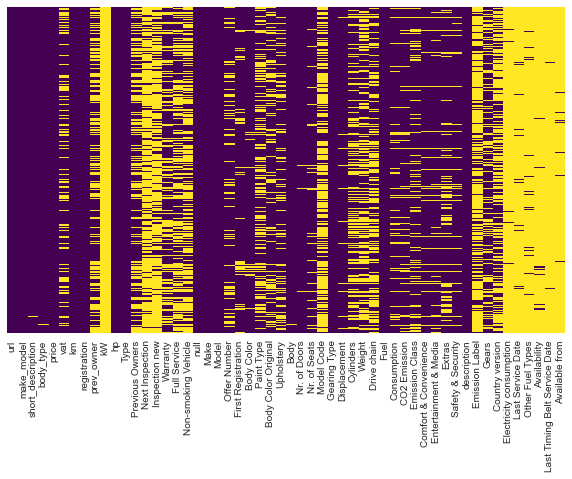

In [11]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [12]:
round(df.isnull().sum()/df.shape[0] * 100, 2).sort_values()

url                               0.000
make_model                        0.000
price                             0.000
description                       0.000
km                                0.000
registration                      0.000
Gearing Type                      0.000
Model                             0.000
hp                                0.000
Make                              0.000
null                              0.000
Fuel                              0.000
Type                              0.010
short_description                 0.290
body_type                         0.380
Body                              0.380
Nr. of Doors                      1.330
Displacement                      3.120
Body Color                        3.750
\nComfort & Convenience\n         5.780
Nr. of Seats                      6.140
\nSafety & Security\n             6.170
\nEntertainment & Media\n         8.630
First Registration               10.030
CO2 Emission                     11.360


We decided to  drop columns that have 90% or more missing values and investigate the rest of the columns of interest for the further phases of project.

In [13]:
df.drop(labels=["Other Fuel Types", "Availability", "Last Service Date", "Available from", "Electricity consumption", "Last Timing Belt Service Date", "kW"], axis=1, inplace=True)

In [14]:
df.columns

Index(['url', 'make_model', 'short_description', 'body_type', 'price', 'vat',
       'km', 'registration', 'prev_owner', 'hp', 'Type', 'Previous Owners',
       'Next Inspection', 'Inspection new', 'Warranty', 'Full Service',
       'Non-smoking Vehicle', 'null', 'Make', 'Model', 'Offer Number',
       'First Registration', 'Body Color', 'Paint Type', 'Body Color Original',
       'Upholstery', 'Body', 'Nr. of Doors', 'Nr. of Seats', 'Model Code',
       'Gearing Type', 'Displacement', 'Cylinders', 'Weight', 'Drive chain',
       'Fuel', 'Consumption', 'CO2 Emission', 'Emission Class',
       '\nComfort & Convenience\n', '\nEntertainment & Media\n', '\nExtras\n',
       '\nSafety & Security\n', 'description', 'Emission Label', 'Gears',
       'Country version'],
      dtype='object')

We removed the unnecessary parts from the column names for the work to progress more easily.

In [15]:
df.rename(columns={
    '\nComfort & Convenience\n': 'comfort_convenience',
    '\nEntertainment & Media\n': 'entertainment_media',
    '\nExtras\n': 'Extras',
    '\nSafety & Security\n': 'safety_security'
},
          inplace=True)

## - url

In [16]:
df["url"].head(10)

0    https://www.autoscout24.com//offers/audi-a1-sp...
1    https://www.autoscout24.com//offers/audi-a1-1-...
2    https://www.autoscout24.com//offers/audi-a1-sp...
3    https://www.autoscout24.com//offers/audi-a1-1-...
4    https://www.autoscout24.com//offers/audi-a1-sp...
5    https://www.autoscout24.com//offers/audi-a1-1-...
6    https://www.autoscout24.com//offers/audi-a1-sp...
7    https://www.autoscout24.com//offers/audi-a1-sp...
8    https://www.autoscout24.com//offers/audi-a1-sp...
9    https://www.autoscout24.com//offers/audi-a1-sp...
Name: url, dtype: object

We do not need this column as it has no effect on the target feature and does not interact with other columns.

In [17]:
df.drop(labels=["url"], axis=1, inplace=True)

## - make_model

In [18]:
df["make_model"].head(10)

0    Audi A1
1    Audi A1
2    Audi A1
3    Audi A1
4    Audi A1
5    Audi A1
6    Audi A1
7    Audi A1
8    Audi A1
9    Audi A1
Name: make_model, dtype: object

In [19]:
df["make_model"].value_counts(dropna=False)

Audi A3           3097
Audi A1           2614
Opel Insignia     2598
Opel Astra        2526
Opel Corsa        2219
Renault Clio      1839
Renault Espace     991
Renault Duster      34
Audi A2              1
Name: make_model, dtype: int64

In [20]:
df["make_model"].isnull().sum()

0

## - short_description

In [21]:
df["short_description"].head(10)

0          Sportback 1.4 TDI S-tronic Xenon Navi Klima
1                                       1.8 TFSI sport
2    Sportback 1.6 TDI S tronic Einparkhilfe plus+m...
3                              1.4 TDi Design S tronic
4    Sportback 1.4 TDI S-Tronic S-Line Ext. admired...
5          1.6 TDI Sport DSG *SHZ*Xenon*Navi*Bose*PDC*
6        Sportback 1.6 TDI S-TRONIC S-LINE*NAVI|XENON*
7                   Sportback 1.4 TDI admired S tronic
8               SPB 1.6 TDI S-tronic Metal plus + Xeno
9                SPORTBACK TFSI ULTRA 95 S-TRONIC AMB.
Name: short_description, dtype: object

In [22]:
df["short_description"].value_counts(dropna=False)

SPB 1.6 TDI 116 CV S tronic Sport                 64
NaN                                               46
1.4 66kW (90CV) Selective                         40
MOVE KLIMA CD USB ALLWETTER BLUETOOTH             38
SPB 30 TDI S tronic Business                      35
                                                  ..
K Sports Tourer Business **Navi*Voll**             1
1.0 Turbo ecoFLEX Automatic Elective Park Navi     1
1.6 CDTI Business *Navi*Automatik*Spurh.*          1
1.6 136 CV Automatica Navi E 6 Garanzia Full       1
TCe 225 EDC GPF LIM Deluxe Pano,RFK                1
Name: short_description, Length: 10002, dtype: int64

In [23]:
round(df["short_description"].isnull().sum()/df.shape[0] * 100, 2)

0.29

In [24]:
df.drop(labels=["short_description"], axis=1, inplace=True)

## - body_type

In [25]:
df["body_type"].head(10)

0           Sedans
1           Sedans
2           Sedans
3           Sedans
4           Sedans
5           Sedans
6    Station wagon
7          Compact
8           Sedans
9           Sedans
Name: body_type, dtype: object

In [26]:
df["body_type"].value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: body_type, dtype: int64

In [27]:
round(df["body_type"].isnull().sum()/df.shape[0] * 100, 2)

0.38

## - price

In [28]:
df["price"].head(10)

0    15770
1    14500
2    14640
3    14500
4    16790
5    15090
6    16422
7    14480
8    16700
9    17990
Name: price, dtype: int64

In [29]:
df["price"].value_counts(dropna=False)

14990    154
15990    151
10990    139
15900    106
17990    102
        ... 
17559      1
17560      1
17570      1
17575      1
39875      1
Name: price, Length: 2956, dtype: int64

In [31]:
round(df["price"].isnull().sum()/df.shape[0] * 100, 2)

0.0

## - vat

In [32]:
df["vat"].head(10)

0      VAT deductible
1    Price negotiable
2      VAT deductible
3                None
4                None
5                None
6      VAT deductible
7      VAT deductible
8                None
9                None
Name: vat, dtype: object

In [33]:
df["vat"].value_counts(dropna=False)

VAT deductible      10980
NaN                  4513
Price negotiable      426
Name: vat, dtype: int64

In [34]:
round(df["vat"].isnull().sum()/df.shape[0] * 100, 2)

28.35

## - km

In [35]:
df["km"].head(10)

0    56,013 km
1    80,000 km
2    83,450 km
3    73,000 km
4    16,200 km
5    63,668 km
6    62,111 km
7    14,986 km
8    57,000 km
9    16,103 km
Name: km, dtype: object

In [36]:
df["km"].tail(10)

15909    3,500 km
15910    8,500 km
15911      100 km
15912        - km
15913    1,000 km
15914        - km
15915    9,900 km
15916       15 km
15917       10 km
15918        - km
Name: km, dtype: object

In [37]:
df['km'] = df.km.str.replace(',','').str.split().str[0]

In [38]:
df["km"] = df.km.replace('-', np.nan).astype('float')

In [39]:
df["km"].value_counts(dropna=False)

10.000       1045
NaN          1024
1.000         367
5.000         170
50.000        148
             ... 
67469.000       1
43197.000       1
10027.000       1
35882.000       1
57.000          1
Name: km, Length: 6690, dtype: int64

In [40]:
round(df["km"].isnull().sum()/df.shape[0] * 100, 2)

6.43

## - registration

In [41]:
df["registration"].head(10)

0    01/2016
1    03/2017
2    02/2016
3    08/2016
4    05/2016
5    02/2016
6    03/2016
7    02/2016
8    02/2016
9    06/2017
Name: registration, dtype: object

In [42]:
df["registration"].value_counts(dropna=False)

-/-        1597
03/2018     695
02/2019     585
05/2018     572
03/2019     543
01/2019     541
04/2018     541
02/2018     539
03/2016     536
04/2016     532
06/2018     532
01/2018     511
04/2019     506
02/2016     472
03/2017     471
05/2016     459
06/2016     452
05/2019     440
06/2017     409
05/2017     404
07/2018     396
04/2017     380
01/2016     376
02/2017     368
01/2017     306
08/2018     285
06/2019     224
07/2017     215
11/2017     180
07/2016     176
10/2016     160
10/2017     154
09/2017     149
11/2016     142
09/2018     141
09/2016     141
12/2016     134
12/2017     123
08/2017     114
11/2018     110
12/2018     103
10/2018      97
08/2016      94
07/2019       6
09/2019       5
08/2019       1
11/2019       1
12/2019       1
Name: registration, dtype: int64

In [43]:
df.drop(labels=["registration"], axis=1, inplace=True)

## - prev_owner

In [44]:
df["prev_owner"].head(10)

0    2 previous owners
1                 None
2     1 previous owner
3     1 previous owner
4     1 previous owner
5     1 previous owner
6     1 previous owner
7     1 previous owner
8     1 previous owner
9                 None
Name: prev_owner, dtype: object

In [45]:
df["prev_owner"].value_counts(dropna=False)

1 previous owner     8294
NaN                  6828
2 previous owners     778
3 previous owners      17
4 previous owners       2
Name: prev_owner, dtype: int64

In [46]:
round(df["prev_owner"].isnull().sum()/df.shape[0] * 100, 2)

42.89

In [47]:
df.drop('prev_owner', axis=1, inplace=True)

## - hp

In [48]:
df['hp'].head(10)

0     66 kW
1    141 kW
2     85 kW
3     66 kW
4     66 kW
5     85 kW
6     85 kW
7     66 kW
8     85 kW
9     70 kW
Name: hp, dtype: object

In [49]:
df['hp'] = df['hp'].str.split().str[0].str.replace('-', '0').astype('float')

In [50]:
df.rename(columns={"hp" : "kW"}, inplace=True)

In [51]:
df['kW'].value_counts(dropna=False)

85.000     2542
66.000     2122
81.000     1402
100.000    1308
110.000    1112
           ... 
84.000        1
195.000       1
44.000        1
239.000       1
9.000         1
Name: kW, Length: 81, dtype: int64

In [52]:
round(df['kW'].isnull().sum()/df.shape[0] * 100, 2)

0.0

## - Type

In [53]:
df["Type"].head(10)

0    [, Used, , Diesel (Particulate Filter)]
1                       [, Used, , Gasoline]
2    [, Used, , Diesel (Particulate Filter)]
3    [, Used, , Diesel (Particulate Filter)]
4    [, Used, , Diesel (Particulate Filter)]
5    [, Used, , Diesel (Particulate Filter)]
6    [, Used, , Diesel (Particulate Filter)]
7    [, Used, , Diesel (Particulate Filter)]
8    [, Used, , Diesel (Particulate Filter)]
9                       [, Used, , Gasoline]
Name: Type, dtype: object

In [54]:
df["Type"] = [i[1] if type(i) == list else i for i in df["Type"]]

In [55]:
df["Type"].value_counts(dropna=False)

Used              11096
New                1650
Pre-registered     1364
Employee's car     1011
Demonstration       796
NaN                   2
Name: Type, dtype: int64

In [56]:
round(df["Type"].isna().sum() / df.shape[0] * 100, 2)

0.01

## - Previous Owners

In [57]:
df["Previous Owners"].head(10)

0    \n2\n
1      NaN
2    \n1\n
3    \n1\n
4    \n1\n
5    \n1\n
6    \n1\n
7    \n1\n
8    \n1\n
9      NaN
Name: Previous Owners, dtype: object

In [58]:
df['Previous Owners'] = [i[0] if type(i) == list else i for i in df["Previous Owners"]]

In [59]:
df["Previous Owners"] = df["Previous Owners"].str.strip("\n").astype('float')

In [60]:
df["Previous Owners"].value_counts(dropna=False)

1.000    8294
NaN      6640
2.000     778
0.000     188
3.000      17
4.000       2
Name: Previous Owners, dtype: int64

In [61]:
round(df["Previous Owners"].isnull().sum()/df.shape[0] * 100, 2)

41.71

## - Next Inspection

In [62]:
df["Next Inspection"].head(10)

0    [\n06/2021\n, \n99 g CO2/km (comb)\n]
1                                      NaN
2                                      NaN
3                                      NaN
4                                      NaN
5                                      NaN
6                                      NaN
7                                      NaN
8    [\n02/2020\n, \n97 g CO2/km (comb)\n]
9                                      NaN
Name: Next Inspection, dtype: object

In [63]:
df['Next Inspection'] = [i[0] if type(i) == list else i for i in df["Next Inspection"]]

In [64]:
df["Next Inspection"] = df["Next Inspection"].str.strip("\n").astype('object')

In [65]:
df["Next Inspection"].value_counts(dropna=False)

NaN        12384
06/2021      471
03/2021      210
05/2021      180
04/2021      171
           ...  
05/2014        1
04/2016        1
01/1955        1
01/2018        1
11/2022        1
Name: Next Inspection, Length: 78, dtype: int64

In [66]:
round(df["Next Inspection"].isnull().sum()/df.shape[0] * 100, 2)

77.79

We can use this column to fill other columns Null datas. This columns have Emission Label, Emission Class, CO2 emission and Consumptuion datas.

With the code below, we have confirmed that the 'Next Inspection' column cannot contribute any null values to the 'Consumption' column.

In [67]:
L = df[(df["Consumption"].isnull()) & (df["Next Inspection"].notnull())]["Next Inspection"]

for i in L:
    if type(i) == list:
        for j in i:
            if "l/100 km" in j:
                print(i)
    else:
        pass
print("Found: ")

Found: 


We checked the Null datas of Consumptions that corresponding to Next Inspection column. Results show us that there are no any consumption data Next Inspection have but Consumption column doesn't have.

With the code below, we have confirmed that the 'Next Inspection' column cannot contribute any null values to the 'CO2 Emission' column.

In [68]:
M = df[(df["CO2 Emission"].isnull()) & (df["Next Inspection"].notnull())]["Next Inspection"]

for i in M:
    if type(i) == list:
        for j in i:
            if "g CO2/km" in j:
                print(i)
    else:
        pass
print("Found: ")

Found: 


We checked the Null datas of CO2 Emissions that corresponding to Next Inspection column. Results show us that there are no any CO2 Emissions data Next Inspection have but Consumption column doesn't have.

With the code below, we have confirmed that the 'Next Inspection' column cannot contribute any null values to the 'Emission Class' column.

In [69]:
N = df[(df["Emission Class"].isnull()) & (df["Next Inspection"].notnull())]["Next Inspection"]
        
for i in N:
    if type(i) == list:
        for j in i:
            if "Euro" in j:
                print(i)
    else:
        pass
print("Found: ")

Found: 


We checked the Null datas of Emission Class that corresponding to Next Inspection column. Results show us that there are no any Emission Class data Next Inspection have but Consumption column doesn't have.

With the code below, we have confirmed that the 'Next Inspection' column cannot contribute any null values to the 'Emission Label' column.

In [70]:
P = df[(df["Emission Label"].isnull()) & (df["Next Inspection"].notnull())]["Next Inspection"]
        
for i in P:
    if type(i) == list:
        for j in i:
            if ("Green" in j) or ("Yellow" in j) or ("Red" in j):
                print(i)
    else:
        pass
print("Found: ")

Found: 


We checked the Null datas of Emission Label that corresponding to Next Inspection column. Results show us that there are no any Emission Label data Next Inspection have but Consumption column doesn't have.

In [71]:
df.drop('Next Inspection', axis=1, inplace=True)

## - Inspection new

In [72]:
df["Inspection new"].head(10)

0                 [\nYes\n, \nEuro 6\n]
1                                   NaN
2                                   NaN
3                                   NaN
4    [\nYes\n, \n109 g CO2/km (comb)\n]
5                                   NaN
6     [\nYes\n, \n98 g CO2/km (comb)\n]
7     [\nYes\n, \n97 g CO2/km (comb)\n]
8                                   NaN
9                                   NaN
Name: Inspection new, dtype: object

In [73]:
df['Inspection_new'] = [i[0] if type(i) == list else i for i in df["Inspection new"]]

In [74]:
df["Inspection_new"] = df["Inspection_new"].str.strip("\n")

In [75]:
df["Inspection new"].astype("str").value_counts(dropna=False)

nan                                                                                                            11987
['\nYes\n', '\nEuro 6\n']                                                                                        523
\nYes\n                                                                                                          362
['\nYes\n', '\n102 g CO2/km (comb)\n']                                                                           174
['\nYes\n', '\n4 (Green)\n']                                                                                     166
                                                                                                               ...  
['\nYes\n', '\n', '6 l/100 km (comb)', '\n', '8 l/100 km (city)', '\n', '4.9 l/100 km (country)', '\n']            1
['\nYes\n', '\n', '6.8 l/100 km (comb)', '\n', '8.5 l/100 km (city)', '\n', '6.1 l/100 km (country)', '\n']        1
['\nYes\n', '\n', '4.1 l/100 km (comb)', '\n', '7.5 l/100 km (ci

In [76]:
round(df["Inspection new"].isnull().sum()/df.shape[0] * 100, 2)

75.3

In [77]:
R = df[(df["Consumption"].isnull()) & (df["Inspection new"].notnull())]["Inspection new"]

for i in R:
    if type(i) == list:
        for j in i:
            if "l/100 km" in j:
                print(i)
    else:
        pass
print("Found: ")

Found: 


In [78]:
S = df[(df["CO2 Emission"].isnull()) & (df["Inspection new"].notnull())]["Inspection new"]

for i in S:
    if type(i) == list:
        for j in i:
            if "g CO2/km" in j:
                print(i)
    else:
        pass
print("Found: ")

Found: 


In [79]:
T = df[(df["Emission Class"].isnull()) & (df["Inspection new"].notnull())]["Inspection new"]
        
for i in T:
    if type(i) == list:
        for j in i:
            if "Euro" in j:
                print(i)
    else:
        pass
print("Found: ")

['\nYes\n', '\nEuro 6d-TEMP\n']
['\nYes\n', '\nEuro 6\n']
['\nYes\n', '\nEuro 6d-TEMP\n']
['\nYes\n', '\nEuro 6d-TEMP\n']
['\nYes\n', '\nEuro 6d-TEMP\n']
['\nYes\n', '\nEuro 6d-TEMP\n']
['\nYes\n', '\nEuro 6d-TEMP\n']
['\nYes\n', '\nEuro 6d-TEMP\n']
['\nYes\n', '\nEuro 6\n']
['\nYes\n', '\nEuro 6d-TEMP\n']
['\nYes\n', '\nEuro 6d-TEMP\n']
['\nYes\n', '\nEuro 6d-TEMP\n']
['\nYes\n', '\nEuro 6d-TEMP\n']
['\nYes\n', '\nEuro 6d-TEMP\n']
['\nYes\n', '\nEuro 6d-TEMP\n']
['\nYes\n', '\nEuro 6\n']
['\nYes\n', '\nEuro 6\n']
['\nYes\n', '\nEuro 6d-TEMP\n']
Found: 


In [80]:
U = df[(df["Emission Label"].isnull()) & (df["Inspection new"].notnull())]["Inspection new"]
        
for i in U:
    if type(i) == list:
        for j in i:
            if ("Green" in j) or ("Yellow" in j) or ("Red" in j):
                print(i)
    else:
        pass
print("Found: ")

['\nYes\n', '\n4 (Green)\n']
['\nYes\n', '\n4 (Green)\n']
['\nYes\n', '\n4 (Green)\n']
['\nYes\n', '\n4 (Green)\n']
['\nYes\n', '\n4 (Green)\n']
['\nYes\n', '\n4 (Green)\n']
['\nYes\n', '\n4 (Green)\n']
['\nYes\n', '\n4 (Green)\n']
['\nYes\n', '\n4 (Green)\n']
['\nYes\n', '\n4 (Green)\n']
['\nYes\n', '\n4 (Green)\n']
['\nYes\n', '\n4 (Green)\n']
['\nYes\n', '\n4 (Green)\n']
['\nYes\n', '\n4 (Green)\n']
['\nYes\n', '\n4 (Green)\n']
['\nYes\n', '\n4 (Green)\n']
['\nYes\n', '\n4 (Green)\n']
['\nYes\n', '\n4 (Green)\n']
['\nYes\n', '\n4 (Green)\n']
['\nYes\n', '\n4 (Green)\n']
['\nYes\n', '\n4 (Green)\n']
['\nYes\n', '\n4 (Green)\n']
['\nYes\n', '\n4 (Green)\n']
['\nYes\n', '\n4 (Green)\n']
['\nYes\n', '\n4 (Green)\n']
Found: 


In [81]:
df.drop('Inspection new', axis=1, inplace=True)

## - Warranty

In [82]:
df["Warranty"].head(10)

0             [\n, \n, \n4 (Green)\n]
1                                 NaN
2    [\n, \n, \n99 g CO2/km (comb)\n]
3                                 NaN
4                [\n, \n, \nEuro 6\n]
5                                 NaN
6                                 NaN
7                [\n, \n, \nEuro 6\n]
8         [\n12 months\n, \nEuro 6\n]
9                        \n3 months\n
Name: Warranty, dtype: object

In [83]:
df['Warranty'] = df.Warranty.apply(lambda x : x[0] if type(x)==list else x)

In [84]:
df['Warranty'] = df.Warranty.str.strip('\n').str.extract('(\d{1,2})').astype('float')

In [85]:
df["Warranty"].value_counts(dropna=False)

NaN       11066
12.000     2594
24.000     1118
60.000      401
36.000      279
48.000      149
6.000       125
72.000       59
3.000        33
23.000       11
18.000       10
20.000        7
25.000        6
2.000         5
50.000        4
26.000        4
16.000        4
4.000         3
1.000         3
19.000        3
34.000        3
13.000        3
28.000        2
22.000        2
14.000        2
11.000        2
46.000        2
21.000        2
9.000         2
17.000        2
45.000        2
33.000        1
40.000        1
65.000        1
10.000        1
15.000        1
7.000         1
8.000         1
56.000        1
49.000        1
47.000        1
30.000        1
Name: Warranty, dtype: int64

In [86]:
round(df["Warranty"].isnull().sum()/df.shape[0] * 100, 2)

69.51

In [87]:
A = df[(df["Consumption"].isnull()) & (df["Warranty"].notnull())]["Warranty"]

for i in A:
    if type(i) == list:
        for j in i:
            if "l/100 km" in j:
                print(i)
    else:
        pass
print("Found: ")

Found: 


In [88]:
B = df[(df["CO2 Emission"].isnull()) & (df["Warranty"].notnull())]["Warranty"]

for i in B:
    if type(i) == list:
        for j in i:
            if "g CO2/km" in j:
                print(i)
    else:
        pass
print("Found: ")

Found: 


In [89]:
C = df[(df["Emission Class"].isnull()) & (df["Warranty"].notnull())]["Warranty"]
        
for i in C:
    if type(i) == list:
        for j in i:
            if "Euro" in j:
                print(i)
    else:
        pass
print("Found: ")

Found: 


In [90]:
D = df[(df["Emission Label"].isnull()) & (df["Warranty"].notnull())]["Warranty"]
        
for i in D:
    if type(i) == list:
        for j in i:
            if ("Green" in j) or ("Yellow" in j) or ("Red" in j):
                print(i)
    else:
        pass
print("Found: ")

Found: 


## - Full Service

In [91]:
df["Full Service"].head(10)

0                            [\n, \n]
1                                 NaN
2                                 NaN
3    [\n, \n, \n99 g CO2/km (comb)\n]
4             [\n, \n, \n4 (Green)\n]
5    [\n, \n, \n92 g CO2/km (comb)\n]
6                [\n, \n, \nEuro 6\n]
7             [\n, \n, \n4 (Green)\n]
8                                 NaN
9                                 NaN
Name: Full Service, dtype: object

In [92]:
df["Full Service"].astype('str').value_counts(dropna=False)

nan                                                                                                             7704
['\n', '\n', '\n4 (Green)\n']                                                                                   2235
['\n', '\n', '\nEuro 6\n']                                                                                      2097
['\n', '\n']                                                                                                    1702
['\n', '\n', '\nEuro 6d-TEMP\n']                                                                                 399
                                                                                                                ... 
['\n', '\n', '\n80 g CO2/km (comb)\n']                                                                             1
['\n', '\n', '\n84 g CO2/km (comb)\n']                                                                             1
['\n', '\n', '\n', '6 l/100 km (comb)', '\n', '8 l/100 km (city)

In [93]:
round(df["Full Service"].isnull().sum()/df.shape[0] * 100, 2)

48.39

In [94]:
""" Trying to auto fill a column's Nan values from other column's value

AA = df["Emission Class"]
BB = df["Full Service"]
text = "Euro"
LL = list(zip(AA, BB))

AAL = df["New Full Service"]

idx = 0
k = 0

for idx < BB.shape[0]:
    for i,j in LL:
        if (i == np.nan) & (j != np.nan):
            if type(j) == list:
                for k in range(len(j)):
                    if text in j[k]:
                        AAL.iloc(idx) = j[k]
                    else:
                        pass
                    k += 1
            else:
                pass
        else:
            pass
            
    idx + = 1
    
AAL.head(10)

# df[["Emission Class", "Full Service"]].iloc[9779]
"""

' Trying to auto fill a column\'s Nan values from other column\'s value\n\nAA = df["Emission Class"]\nBB = df["Full Service"]\ntext = "Euro"\nLL = list(zip(AA, BB))\n\nAAL = df["New Full Service"]\n\nidx = 0\nk = 0\n\nfor idx < BB.shape[0]:\n    for i,j in LL:\n        if (i == np.nan) & (j != np.nan):\n            if type(j) == list:\n                for k in range(len(j)):\n                    if text in j[k]:\n                        AAL.iloc(idx) = j[k]\n                    else:\n                        pass\n                    k += 1\n            else:\n                pass\n        else:\n            pass\n            \n    idx + = 1\n    \nAAL.head(10)\n\n# df[["Emission Class", "Full Service"]].iloc[9779]\n'

In [95]:
E = df[(df["Emission Class"].isnull()) & (df["Full Service"].notnull())]["Full Service"]

for i in E:
    if type(i) == list:
        for j in i:
            if "Euro" in j:
                print(i)
    else:
        pass
print("Found: ")

['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
['\n', '\n', '\nEuro 6\n']
[

In [96]:
df.drop('Full Service', axis=1, inplace=True)

## - Non-smoking Vehicle

In [97]:
df["Non-smoking Vehicle"].head(10)

0                   [\n, \n]
1                        NaN
2                        NaN
3       [\n, \n, \nEuro 6\n]
4                   [\n, \n]
5       [\n, \n, \nEuro 6\n]
6    [\n, \n, \n4 (Green)\n]
7                        NaN
8                        NaN
9                        NaN
Name: Non-smoking Vehicle, dtype: object

In [98]:
df["Non-smoking Vehicle"].astype('str').value_counts(dropna=False)

nan                                                                                                             8742
['\n', '\n']                                                                                                    3647
['\n', '\n', '\n4 (Green)\n']                                                                                   1240
['\n', '\n', '\nEuro 6\n']                                                                                      1127
['\n', '\n', '\nEuro 6d-TEMP\n']                                                                                 345
                                                                                                                ... 
['\n', '\n', '\n', '5.6 l/100 km (comb)', '\n', '7.3 l/100 km (city)', '\n', '4.7 l/100 km (country)', '\n']       1
['\n', '\n', '\n122 g CO2/km (comb)\n']                                                                            1
['\n', '\n', '\n158 g CO2/km (comb)\n']                         

In [99]:
round(df["Non-smoking Vehicle"].isnull().sum()/df.shape[0] * 100, 2)

54.92

In [100]:
df.drop('Non-smoking Vehicle', axis=1, inplace=True)

## - null

There are no data in this column so we will drop this column

In [101]:
df.null.astype('str').value_counts(dropna=False)

[]    15919
Name: null, dtype: int64

In [102]:
df.drop('null', axis=1, inplace=True)

## - Make

Make_Model column have every data this column have so we will drop tihs column

In [103]:
df.drop(["Make"], axis=1, inplace=True)

## - Model

Make_Model column have every data this column have so we will drop tihs column

In [104]:
df.drop(["Model"], axis=1, inplace=True)

## - Offer Number

In [105]:
df["Offer Number"].head(10)

0    [\nLR-062483\n]
1                NaN
2     [\nAM-95365\n]
3                NaN
4        [\nC1626\n]
5      [\nJV03654\n]
6       [\n200-19\n]
7    [\n18381A-Q2\n]
8     [\n11540324\n]
9                NaN
Name: Offer Number, dtype: object

In [106]:
df.drop('Offer Number', axis=1, inplace=True)

## - First Registration

In [107]:
df["First Registration"].head(10)

0    [\n, 2016, \n]
1    [\n, 2017, \n]
2    [\n, 2016, \n]
3    [\n, 2016, \n]
4    [\n, 2016, \n]
5    [\n, 2016, \n]
6    [\n, 2016, \n]
7    [\n, 2016, \n]
8    [\n, 2016, \n]
9    [\n, 2017, \n]
Name: First Registration, dtype: object

In [108]:
df['First Registration'] = df['First Registration'].str[1].astype('float')

In [109]:
df["First Registration"].value_counts(dropna=False)

2018.000    4522
2016.000    3674
2017.000    3273
2019.000    2853
NaN         1597
Name: First Registration, dtype: int64

In [110]:
round(df["First Registration"].isnull().sum()/df.shape[0] * 100, 2)

10.03

In [111]:
df['age'] = 2019 - df['First Registration']

In [112]:
df.drop(['First Registration'], axis=1, inplace=True)

## - Body Color

In [113]:
df["Body Color"].head(10)

0    [\n, Black, \n]
1      [\n, Red, \n]
2    [\n, Black, \n]
3    [\n, Brown, \n]
4    [\n, Black, \n]
5    [\n, White, \n]
6    [\n, White, \n]
7      [\n, Red, \n]
8     [\n, Grey, \n]
9    [\n, White, \n]
Name: Body Color, dtype: object

In [114]:
df["Body Color"] = [i[1] if type(i) == list else i for i in df["Body Color"]]

In [115]:
df['Body Color'].value_counts(dropna=False)

Black     3745
Grey      3505
White     3406
Silver    1647
Blue      1431
Red        957
NaN        597
Brown      289
Green      154
Beige      108
Yellow      51
Violet      18
Bronze       6
Orange       3
Gold         2
Name: Body Color, dtype: int64

In [116]:
round(df["Body Color"].isnull().sum()/df.shape[0] * 100, 2)

3.75

In [117]:
df.drop(["Body Color"], axis=1, inplace=True)

This Column has no affects on the price column. Thats why we will drop it.

## - Body Color Original

In [118]:
df["Body Color Original"].head(10)

0             [\nMythosschwarz\n]
1                             NaN
2    [\nmythosschwarz metallic\n]
3                             NaN
4    [\nMythosschwarz Metallic\n]
5                             NaN
6            [\nGletscherweiss\n]
7      [\nMisanorot Perleffekt\n]
8                    [\nGrigio\n]
9                     [\nBlanc\n]
Name: Body Color Original, dtype: object

In [119]:
df["Body Color Original"] = [i[0] if type(i) == list else i for i in df["Body Color Original"]]

In [120]:
df['Body Color Original'].value_counts(dropna=False)

NaN                                  3759
\nOnyx Schwarz\n                      338
\nBianco\n                            282
\nMythosschwarz Metallic\n            238
\nBrillantschwarz\n                   216
                                     ... 
\nRouge-Braun (G0Y)\n                   1
\nVARI COLRI DISPONIBILI\n              1
\nKokosnussbraun Metallic\n             1
\nFarbe frei wählbar\n                  1
\nPerlmutt-Weiß Metallic (Weiß)\n       1
Name: Body Color Original, Length: 1928, dtype: int64

In [121]:
round(df["Body Color Original"].isnull().sum()/df.shape[0] * 100, 2) 

23.61

In [122]:
df.drop(["Body Color Original"], axis=1, inplace=True)

This Column has no affects on the price column. Thats why we will drop it.

## - Paint Type

In [123]:
df["Paint Type"].head(10)

0    [\nMetallic\n]
1               NaN
2    [\nMetallic\n]
3    [\nMetallic\n]
4    [\nMetallic\n]
5    [\nMetallic\n]
6    [\nMetallic\n]
7    [\nMetallic\n]
8    [\nMetallic\n]
9               NaN
Name: Paint Type, dtype: object

In [124]:
df["Paint Type"] = [i[0] if type(i) == list else i for i in df["Paint Type"]]

In [125]:
df['Paint Type'].value_counts(dropna=False)

\nMetallic\n       9794
NaN                5772
\nUni/basic\n       347
\nPerl effect\n       6
Name: Paint Type, dtype: int64

In [126]:
round(df["Paint Type"].isnull().sum()/df.shape[0] * 100, 2) 

36.26

In [127]:
df.drop(["Paint Type"], axis=1, inplace=True)

This Column has no affects on the price column. Thats why we will drop it. Also most of the Paint Types are metallic and there are lots of NaN values.

## - Upholstery

In [128]:
df["Upholstery"].head(10)

0           [\nCloth, Black\n]
1            [\nCloth, Grey\n]
2           [\nCloth, Black\n]
3                          NaN
4           [\nCloth, Black\n]
5    [\nPart leather, Black\n]
6    [\nPart leather, Black\n]
7           [\nCloth, Black\n]
8            [\nCloth, Grey\n]
9                          NaN
Name: Upholstery, dtype: object

In [129]:
df['Upholstery'] = [i[0] if type(i) == list else i for i in df["Upholstery"]]

In [130]:
df['Upholstery'] = df.Upholstery.str.strip("\n").str.split(", ")

In [131]:
df['Upholstery'].astype("str").value_counts(dropna=False)

['Cloth', 'Black']           5821
nan                          3720
['Part leather', 'Black']    1121
['Cloth']                    1005
['Cloth', 'Grey']             891
['Cloth', 'Other']            639
['Full leather', 'Black']     575
['Black']                     491
['Grey']                      273
['Other', 'Other']            182
['Part leather']              140
['Full leather']              139
['Full leather', 'Brown']     116
['Part leather', 'Grey']      116
['Other', 'Black']            110
['Full leather', 'Other']      72
['Full leather', 'Grey']       67
['Part leather', 'Other']      65
['Other']                      56
['Part leather', 'Brown']      50
['alcantara', 'Black']         47
['Velour', 'Black']            36
['Full leather', 'Beige']      36
['Cloth', 'Brown']             28
['Velour']                     16
['Other', 'Grey']              15
['Cloth', 'Beige']             13
['Brown']                      12
['Cloth', 'Blue']              12
['Velour', 'Gr

In [132]:
round(df["Upholstery"].isnull().sum()/df.shape[0] * 100, 2) 

23.37

In [133]:
u_type = ['Part leather', 'Full leather', 'Cloth', 'alcantara', 'Velour']

In [134]:
df['Upholstery_type'] = df.Upholstery.apply(lambda x : x[0] if type(x) == list and x[0] in u_type else np.nan)

In [135]:
df['Upholstery_type'].value_counts(dropna=False)

Cloth           8423
NaN             4871
Part leather    1499
Full leather    1009
Velour            60
alcantara         57
Name: Upholstery_type, dtype: int64

In [136]:
round(df["Upholstery_type"].isnull().sum()/df.shape[0] * 100, 2) 

30.6

In [137]:
df.drop('Upholstery', axis=1, inplace=True)

## - Body

In [138]:
df["Body"].head(10)

0           [\n, Sedans, \n]
1           [\n, Sedans, \n]
2           [\n, Sedans, \n]
3           [\n, Sedans, \n]
4           [\n, Sedans, \n]
5           [\n, Sedans, \n]
6    [\n, Station wagon, \n]
7          [\n, Compact, \n]
8           [\n, Sedans, \n]
9           [\n, Sedans, \n]
Name: Body, dtype: object

In [139]:
df['Body'] = [i[1] if type(i) == list else i for i in df["Body"]]

In [140]:
df['Body'].value_counts(dropna=False)

Sedans           7903
Station wagon    3553
Compact          3153
Van               783
Other             290
Transporter        88
NaN                60
Off-Road           56
Coupe              25
Convertible         8
Name: Body, dtype: int64

In [141]:
round(df["Body"].isnull().sum()/df.shape[0] * 100, 2) 

0.38

In [142]:
df.drop('Body', axis=1, inplace=True)

This column has the same values as the column 'Body_type'. That's why we decided to drop it.

## - Nr. of Doors

In [143]:
df["Nr. of Doors"].head(10)

0    [\n5\n]
1    [\n3\n]
2    [\n4\n]
3    [\n3\n]
4    [\n5\n]
5    [\n4\n]
6    [\n4\n]
7    [\n5\n]
8    [\n5\n]
9    [\n5\n]
Name: Nr. of Doors, dtype: object

In [144]:
df['Nr. of Doors'] = df['Nr. of Doors'].str[0].str.strip('\n').astype('float')

In [145]:
df["Nr. of Doors"].value_counts(dropna=False)

5.000    11575
4.000     3079
3.000      832
2.000      219
NaN        212
1.000        1
7.000        1
Name: Nr. of Doors, dtype: int64

In [146]:
round(df["Nr. of Doors"].isnull().sum()/df.shape[0] * 100, 2) 

1.33

## - Nr. of Seats

In [147]:
df["Nr. of Seats"].head(10)

0    [\n5\n]
1    [\n4\n]
2    [\n4\n]
3    [\n4\n]
4    [\n5\n]
5    [\n5\n]
6    [\n5\n]
7    [\n5\n]
8    [\n4\n]
9    [\n4\n]
Name: Nr. of Seats, dtype: object

In [148]:
df['Nr. of Seats'] = df['Nr. of Seats'].str[0].str.strip('\n').astype('float')

In [149]:
df["Nr. of Seats"].value_counts(dropna=False)

5.000    13336
4.000     1125
NaN        977
7.000      362
2.000      116
6.000        2
3.000        1
Name: Nr. of Seats, dtype: int64

In [150]:
round(df["Nr. of Seats"].isnull().sum()/df.shape[0] * 100, 2) 

6.14

## - Model Code

In [151]:
df["Model Code"].head(10)

0    [\n0588/BDF\n]
1    [\n0588/BCY\n]
2               NaN
3               NaN
4    [\n0588/BDF\n]
5               NaN
6               NaN
7    [\n0588/BDF\n]
8               NaN
9               NaN
Name: Model Code, dtype: object

In [152]:
df['Model Code'] = df['Model Code'].str[0].str.strip('\n')

In [153]:
df["Model Code"].value_counts(dropna=False)

NaN         10941
0035/BCB      268
0588/BNO      245
0588/BDB      206
0588/BHX      188
            ...  
0035/AVN        1
0035/BEM        1
0035/BAG        1
0035/BAA        1
3333/BKG        1
Name: Model Code, Length: 233, dtype: int64

In [154]:
round(df["Model Code"].isnull().sum()/df.shape[0] * 100, 2) 

68.73

In [155]:
df.drop(["Model Code"], axis=1, inplace=True)

We dropped it because this column has complicated values which are useless for price column.

## - Gearing Type

In [156]:
df["Gearing Type"].head(10)

0    [\n, Automatic, \n]
1    [\n, Automatic, \n]
2    [\n, Automatic, \n]
3    [\n, Automatic, \n]
4    [\n, Automatic, \n]
5    [\n, Automatic, \n]
6    [\n, Automatic, \n]
7    [\n, Automatic, \n]
8    [\n, Automatic, \n]
9    [\n, Automatic, \n]
Name: Gearing Type, dtype: object

In [157]:
df['Gearing Type'] = [i[1] if type(i) == list else i for i in df["Gearing Type"]]

In [158]:
df["Gearing Type"].value_counts(dropna=False)

Manual            8153
Automatic         7297
Semi-automatic     469
Name: Gearing Type, dtype: int64

In [159]:
round(df["Gearing Type"].isnull().sum()/df.shape[0] * 100, 2) 

0.0

## - Displacement

In [160]:
df["Displacement"].head(10)

0    [\n1,422 cc\n]
1    [\n1,798 cc\n]
2    [\n1,598 cc\n]
3    [\n1,422 cc\n]
4    [\n1,422 cc\n]
5    [\n1,598 cc\n]
6    [\n1,598 cc\n]
7    [\n1,422 cc\n]
8    [\n1,598 cc\n]
9      [\n999 cc\n]
Name: Displacement, dtype: object

In [161]:
df["Displacement_cc"] = df.Displacement.str[0].str.strip('\n')

In [162]:
df["Displacement_cc"] = df["Displacement_cc"].str.strip('cc').str.replace(',','', regex=True).astype('float')

In [163]:
df["Displacement_cc"].value_counts(dropna=False)

1598.000    4761
999.000     2438
1398.000    1314
1399.000     749
1229.000     677
            ... 
122.000        1
1198.000       1
1195.000       1
2967.000       1
1800.000       1
Name: Displacement_cc, Length: 78, dtype: int64

In [164]:
round(df["Displacement_cc"].isnull().sum()/df.shape[0] * 100, 2) 

3.12

In [165]:
df.drop(["Displacement"], axis=1, inplace=True)

We have transported the values of 'Displacement' to the new column named 'Displacement_cc'. That's why we will drop it.

## - Cylinders

In [166]:
df["Cylinders"].head(10)

0    [\n3\n]
1    [\n4\n]
2        NaN
3    [\n3\n]
4    [\n3\n]
5        NaN
6    [\n4\n]
7        NaN
8    [\n4\n]
9        NaN
Name: Cylinders, dtype: object

In [167]:
df.Cylinders = df.Cylinders.str[0].str.strip('\n').astype('float')

In [168]:
df["Cylinders"].value_counts(dropna=False)

4.000    8105
NaN      5680
3.000    2104
5.000      22
6.000       3
8.000       2
2.000       2
1.000       1
Name: Cylinders, dtype: int64

In [169]:
round(df["Cylinders"].isnull().sum()/df.shape[0] * 100, 2) 

35.68

## - Weight

In [170]:
df["Weight"].head(10)

0    [\n1,220 kg\n]
1    [\n1,255 kg\n]
2               NaN
3    [\n1,195 kg\n]
4               NaN
5               NaN
6               NaN
7               NaN
8    [\n1,275 kg\n]
9               NaN
Name: Weight, dtype: object

In [171]:
df['Weight_kg'] = df.Weight.str[0].str.strip('\n').str.strip('kg').str.replace(',','').astype('float')

In [172]:
df["Weight_kg"].value_counts(dropna=False)

NaN         6974
1163.000     574
1360.000     356
1165.000     301
1335.000     242
            ... 
1960.000       1
1258.000       1
1167.000       1
1331.000       1
2037.000       1
Name: Weight_kg, Length: 435, dtype: int64

In [173]:
round(df["Weight"].isnull().sum()/df.shape[0] * 100, 2) 

43.81

In [174]:
df.drop(["Weight"], axis=1, inplace=True)

We have transported the values of 'Weight' to the new column named 'Weight_kg'. That's why we will drop it.

## - Drive chain

In [175]:
df["Drive chain"].head(10)

0    [\nfront\n]
1    [\nfront\n]
2    [\nfront\n]
3            NaN
4    [\nfront\n]
5            NaN
6    [\nfront\n]
7    [\nfront\n]
8    [\nfront\n]
9            NaN
Name: Drive chain, dtype: object

In [176]:
df['Drive chain'] = df['Drive chain'].str[0].str.strip('\n')

In [177]:
df["Drive chain"].value_counts(dropna=False)

front    8886
NaN      6858
4WD       171
rear        4
Name: Drive chain, dtype: int64

In [178]:
round(df["Drive chain"].isnull().sum()/df.shape[0] * 100, 2) 

43.08

## - Fuel

In [179]:
df["Fuel"].head(10)

0    [\n, Diesel (Particulate Filter), \n]
1                       [\n, Gasoline, \n]
2    [\n, Diesel (Particulate Filter), \n]
3    [\n, Diesel (Particulate Filter), \n]
4    [\n, Diesel (Particulate Filter), \n]
5    [\n, Diesel (Particulate Filter), \n]
6    [\n, Diesel (Particulate Filter), \n]
7    [\n, Diesel (Particulate Filter), \n]
8    [\n, Diesel (Particulate Filter), \n]
9                       [\n, Gasoline, \n]
Name: Fuel, dtype: object

In [180]:
df["Fuel"] = df.Fuel.str[1]
df["Fuel"] = df.Fuel.str.split("/").str[0].str.strip()
df["Fuel"] = df.Fuel.str.split("(").str[0].str.strip()

In [181]:
df["Fuel"].value_counts(dropna=False)

Diesel                  7299
Super 95                4368
Gasoline                3252
Regular                  503
Super E10 95             409
CNG                       36
LPG                       16
Super Plus 98             11
Liquid petroleum gas      10
Others                     6
Electric                   5
Super Plus E10 98          2
Biogas                     1
Domestic gas H             1
Name: Fuel, dtype: int64

In [182]:
round(df["Fuel"].isnull().sum()/df.shape[0] * 100, 2) 

0.0

In [183]:
benzine = [
    "Gasoline", "Super 95", "Regular", "Super E10 95", "Super Plus 98",
    "Super Plus E10 98", "Others"
]
lpg = ["LPG", "Liquid petroleum gas", "CNG", "Biogas", "Domestic gas H"]
electric = ["Electric"]


def fueltype(x):
    if x in benzine:
        return "Benzine"
    elif x in electric:
        return "Electric"
    elif x in lpg:
        return "LPG/CNG"
    else:
        return x


df["Fuel"] = df.Fuel.apply(fueltype)

In [184]:
df["Fuel"].value_counts(dropna=False)

Benzine     8551
Diesel      7299
LPG/CNG       64
Electric       5
Name: Fuel, dtype: int64

## - Consumption

In [185]:
df["Consumption"].head(10)

0    [[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...
1    [[5.6 l/100 km (comb)], [7.1 l/100 km (city)],...
2    [[3.8 l/100 km (comb)], [4.4 l/100 km (city)],...
3    [[3.8 l/100 km (comb)], [4.3 l/100 km (city)],...
4    [[4.1 l/100 km (comb)], [4.6 l/100 km (city)],...
5    [[3.5 l/100 km (comb)], [4.3 l/100 km (city)],...
6    [[3.7 l/100 km (comb)], [4.3 l/100 km (city)],...
7    [[3.7 l/100 km (comb)], [4.2 l/100 km (city)],...
8    [[3.7 l/100 km (comb)], [4.3 l/100 km (city)],...
9                                                  NaN
Name: Consumption, dtype: object

In [186]:
def parser1(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[0] != []:
            return x[0][0]
        else:
            return np.nan
    else:
        return x[1]


def parser2(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[1] != []:
            return x[1][0]
        else:
            return np.nan
    elif x[3].endswith(')'):
        return x[3]
    else:
        return np.nan


def parser3(x):
    if type(x) == float:
        return np.nan
    elif type(x[0]) == list:
        if x[2] != []:
            return x[2][0]
        else:
            return np.nan
    elif type(x[0]) != list and x[3].endswith(')'):
        return x[5]
    else:
        return np.nan

In [187]:
df['cons_comb'] = df.Consumption.apply(parser1).str.extract(
    '(\d{1,2}.\d|\d{1,3})')[0].astype("float")
df['cons_city'] = df.Consumption.apply(parser2).str.extract(
    '(\d{1,2}.\d|\d{1,3})')[0].astype("float")
df['cons_country'] = df.Consumption.apply(parser3).str.extract(
    '(\d{1,2}.\d|\d{1,3})')[0].astype("float")

In [188]:
df["cons_comb"].sample(5)

13631   3.300
1534    3.900
8226      NaN
3230    4.000
15114     NaN
Name: cons_comb, dtype: float64

In [189]:
df['cons_city'].sample(5)

2878   4.400
4014   4.300
6861   4.200
5723   7.100
9789   6.700
Name: cons_city, dtype: float64

In [190]:
df['cons_country'].sample(5)

1138    3.800
7391    3.300
6198    4.300
12564   5.800
12876   4.000
Name: cons_country, dtype: float64

In [191]:
df["cons_comb"].value_counts(dropna=False).head()

NaN      2033
5.400     770
3.900     733
4.000     713
5.100     657
Name: cons_comb, dtype: int64

In [192]:
round(df["cons_comb"].isnull().sum() / df.shape[0] * 100, 2)

12.77

In [193]:
df.drop('Consumption', axis=1, inplace=True)

## - CO2 Emission

In [194]:
df["CO2 Emission"].head(10)

0     [\n99 g CO2/km (comb)\n]
1    [\n129 g CO2/km (comb)\n]
2     [\n99 g CO2/km (comb)\n]
3     [\n99 g CO2/km (comb)\n]
4    [\n109 g CO2/km (comb)\n]
5     [\n92 g CO2/km (comb)\n]
6     [\n98 g CO2/km (comb)\n]
7     [\n97 g CO2/km (comb)\n]
8     [\n97 g CO2/km (comb)\n]
9                          NaN
Name: CO2 Emission, dtype: object

In [195]:
df["CO2 Emission"] = [
    item[0] if type(item) == list else item for item in df["CO2 Emission"]
]
df["CO2 Emission"] = df["CO2 Emission"].str.strip("\n").str.rstrip(
    " g CO2/km (comb)").str.replace(",", ".").astype("float")

In [196]:
df["CO2 Emission"].value_counts(dropna=False)

NaN        2436
120.000     740
99.000      545
97.000      537
104.000     501
           ... 
990.000       1
12.324        1
1.060         1
51.000        1
193.000       1
Name: CO2 Emission, Length: 121, dtype: int64

In [197]:
round(df["CO2 Emission"].isnull().sum()/df.shape[0] * 100, 2) 

15.3

## - Emission Class

In [198]:
df["Emission Class"].head(10)

0    [\nEuro 6\n]
1    [\nEuro 6\n]
2    [\nEuro 6\n]
3    [\nEuro 6\n]
4    [\nEuro 6\n]
5    [\nEuro 6\n]
6    [\nEuro 6\n]
7    [\nEuro 6\n]
8    [\nEuro 6\n]
9             NaN
Name: Emission Class, dtype: object

In [199]:
df["Emission Class"] = df["Emission Class"].apply(
    lambda item: item[0] if type(item) == list else item)

df["Emission Class"] = df["Emission Class"].str.strip('\n').str.replace(
    ' ', '', regex=True)

In [200]:
df["Emission Class"].value_counts(dropna=False)

Euro6          10139
NaN             3628
Euro6d-TEMP     1845
Euro6c           127
Euro5             78
Euro6d            62
Euro4             40
Name: Emission Class, dtype: int64

In [201]:
round(df["Emission Class"].isnull().sum()/df.shape[0] * 100, 2) 

22.79

## - comfort_convenience

In [202]:
df["comfort_convenience"].head(10)

0    [Air conditioning, Armrest, Automatic climate ...
1    [Air conditioning, Automatic climate control, ...
2    [Air conditioning, Cruise control, Electrical ...
3    [Air suspension, Armrest, Auxiliary heating, E...
4    [Air conditioning, Armrest, Automatic climate ...
5    [Air conditioning, Armrest, Automatic climate ...
6    [Air conditioning, Armrest, Automatic climate ...
7    [Air conditioning, Armrest, Electrical side mi...
8                    [Air conditioning, Power windows]
9                                                  NaN
Name: comfort_convenience, dtype: object

In [203]:
df["comfort_convenience"] = [
    ",".join(item) if type(item) == list else item
    for item in df["comfort_convenience"]
]

In [204]:
df["comfort_convenience"].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  920
Air conditioning,Electrical side mirrors,Hill Holder,Power windows                                                                                                                                                                                                                                                                                                                                                                                                                                   216
Air conditioning,Elect

In [205]:
round(df["comfort_convenience"].isnull().sum()/df.shape[0] * 100, 2) 

5.78

## - entertainment_media

In [206]:
df["entertainment_media"].head(10)

0    [Bluetooth, Hands-free equipment, On-board com...
1    [Bluetooth, Hands-free equipment, On-board com...
2                             [MP3, On-board computer]
3    [Bluetooth, CD player, Hands-free equipment, M...
4    [Bluetooth, CD player, Hands-free equipment, M...
5    [Bluetooth, Hands-free equipment, On-board com...
6    [Bluetooth, CD player, Hands-free equipment, O...
7                              [CD player, MP3, Radio]
8                                              [Radio]
9                                                  NaN
Name: entertainment_media, dtype: object

In [207]:
df["entertainment_media"] = [
    ",".join(item) if type(item) == list else item
    for item in df["entertainment_media"]
]

In [208]:
df["entertainment_media"].value_counts(dropna=False)

NaN                                                                                                 1374
Bluetooth,Hands-free equipment,On-board computer,Radio,USB                                          1282
Bluetooth,Hands-free equipment,MP3,On-board computer,Radio,USB                                       982
Bluetooth,CD player,Hands-free equipment,MP3,On-board computer,Radio,USB                             783
On-board computer,Radio                                                                              487
                                                                                                    ... 
Bluetooth,CD player,Digital radio,Hands-free equipment,Radio                                           1
CD player,Hands-free equipment,MP3,Radio,USB                                                           1
MP3,Radio,Sound system,USB                                                                             1
Bluetooth,MP3,On-board computer,Radio,Television,USB   

In [209]:
round(df["entertainment_media"].isnull().sum()/df.shape[0] * 100, 2) 

8.63

## - Extras

In [210]:
df["Extras"].head(10)

0    [Alloy wheels, Catalytic Converter, Voice Cont...
1    [Alloy wheels, Sport seats, Sport suspension, ...
2                        [Alloy wheels, Voice Control]
3           [Alloy wheels, Sport seats, Voice Control]
4    [Alloy wheels, Sport package, Sport suspension...
5    [Alloy wheels, Sport package, Sport seats, Spo...
6    [Alloy wheels, Sport package, Sport seats, Spo...
7                                       [Alloy wheels]
8                                       [Alloy wheels]
9                                                  NaN
Name: Extras, dtype: object

In [211]:
df['Extras'] = [
    ",".join(item) if type(item) == list else item for item in df['Extras']
]

In [212]:
df['Extras'].value_counts(dropna=False)

Alloy wheels                                                                                               3245
NaN                                                                                                        2962
Alloy wheels,Touch screen                                                                                   697
Alloy wheels,Voice Control                                                                                  577
Alloy wheels,Touch screen,Voice Control                                                                     541
                                                                                                           ... 
Alloy wheels,Catalytic Converter,Shift paddles,Sport package,Sport seats,Sport suspension,Voice Control       1
Alloy wheels,Catalytic Converter,Roof rack,Sport package,Sport seats,Trailer hitch                            1
Alloy wheels,Catalytic Converter,Ski bag,Sport package,Voice Control                                    

In [213]:
round(df["Extras"].isnull().sum()/df.shape[0] * 100, 2) 

18.61

## - safety_security

In [214]:
df["safety_security"].head(10)

0    [ABS, Central door lock, Daytime running light...
1    [ABS, Central door lock, Central door lock wit...
2    [ABS, Central door lock, Daytime running light...
3    [ABS, Alarm system, Central door lock with rem...
4    [ABS, Central door lock, Driver-side airbag, E...
5    [ABS, Central door lock, Daytime running light...
6    [ABS, Central door lock, Daytime running light...
7    [ABS, Central door lock, Daytime running light...
8    [ABS, Central door lock, Driver-side airbag, E...
9                                                  NaN
Name: safety_security, dtype: object

In [215]:
df['safety_security'] = [
    ",".join(item) if type(item) == list else item
    for item in df['safety_security']
]

In [216]:
df["safety_security"].value_counts(dropna=False)

NaN                                                                                                                                                                                                                                                                                                                                                               982
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Fog lights,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                                                                                      538
ABS,Central door lock,Daytime running lights,Driver-side airbag,Electronic stability control,Immobilizer,Isofix,Passenger-side airbag,Power steering,Side airbag,Tire pressure monitoring system,Traction control                                                                           

In [217]:
round(df["safety_security"].isnull().sum()/df.shape[0] * 100, 2) 

6.17

## - description

In [218]:
df["description"].head(10)

0    [\n, Sicherheit:,  , Deaktivierung für Beifahr...
1    [\nLangstreckenfahrzeug daher die hohe Kilomet...
2    [\n, Fahrzeug-Nummer: AM-95365,  , Ehem. UPE 2...
3    [\nAudi A1: , - 1e eigenaar , - Perfecte staat...
4    [\n, Technik & Sicherheit:, Xenon plus, Klimaa...
5    [\nSichern Sie sich diesen Audi A1 1.6 TDI Spo...
6    [\nREDUZIERT !!!, MwSt. ausweisbar, Nettopreis...
7    [\n, Ausstattungspakete:,  Ausstattungspaket: ...
8    [\nAuto in ottime condizioni. Unico proprietar...
9    [\nClim automatique,Ecran multifonction couleu...
Name: description, dtype: object

In [219]:
df.drop('description', axis=1, inplace=True)

## - Emission Label

In [220]:
df["Emission Label"].head(10)

0                NaN
1    [\n4 (Green)\n]
2    [\n4 (Green)\n]
3                NaN
4                NaN
5    [\n4 (Green)\n]
6                NaN
7                NaN
8                NaN
9                NaN
Name: Emission Label, dtype: object

In [221]:
df.drop('Emission Label', axis=1, inplace=True)

## - Gears

In [222]:
df["Gears"].head(10)

0        NaN
1    [\n7\n]
2        NaN
3    [\n6\n]
4        NaN
5        NaN
6        NaN
7    [\n7\n]
8    [\n7\n]
9    [\n7\n]
Name: Gears, dtype: object

In [223]:
df["Gears"] = df.Gears.str[0].str.strip('\n')

In [224]:
df["Gears"].value_counts(dropna=False)

6      5822
NaN    4712
5      3239
7      1908
8       224
9         6
1         2
3         2
4         2
2         1
50        1
Name: Gears, dtype: int64

In [225]:
round(df["Gears"].isnull().sum()/df.shape[0] * 100, 2) 

29.6

## - Country version

In [226]:
df["Country version"].head(10)

0              NaN
1              NaN
2              NaN
3              NaN
4    [\nGermany\n]
5    [\nGermany\n]
6    [\nGermany\n]
7              NaN
8              NaN
9              NaN
Name: Country version, dtype: object

In [227]:
df["Country version"] = df['Country version'].str[0].str.strip('\n')

In [228]:
df['Country version'].value_counts(dropna=False)

NaN               8333
Germany           4502
Italy             1038
European Union     507
Netherlands        464
Spain              325
Belgium            314
Austria            208
Czech Republic      52
Poland              49
France              38
Denmark             33
Hungary             28
Japan                8
Slovakia             4
Croatia              4
Sweden               3
Romania              2
Bulgaria             2
Luxembourg           1
Switzerland          1
Slovenia             1
Egypt                1
Serbia               1
Name: Country version, dtype: int64

In [229]:
df.drop('Country version', axis=1, inplace=True)

In [230]:
df.columns

Index(['make_model', 'body_type', 'price', 'vat', 'km', 'kW', 'Type',
       'Previous Owners', 'Warranty', 'Nr. of Doors', 'Nr. of Seats',
       'Gearing Type', 'Cylinders', 'Drive chain', 'Fuel', 'CO2 Emission',
       'Emission Class', 'comfort_convenience', 'entertainment_media',
       'Extras', 'safety_security', 'Gears', 'Inspection_new', 'age',
       'Upholstery_type', 'Displacement_cc', 'Weight_kg', 'cons_comb',
       'cons_city', 'cons_country'],
      dtype='object')

In [231]:
df.shape

(15919, 30)

In [232]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15919 entries, 0 to 15918
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   make_model           15919 non-null  object 
 1   body_type            15859 non-null  object 
 2   price                15919 non-null  int64  
 3   vat                  11406 non-null  object 
 4   km                   14895 non-null  float64
 5   kW                   15919 non-null  float64
 6   Type                 15917 non-null  object 
 7   Previous Owners      9279 non-null   float64
 8   Warranty             4853 non-null   float64
 9   Nr. of Doors         15707 non-null  float64
 10  Nr. of Seats         14942 non-null  float64
 11  Gearing Type         15919 non-null  object 
 12  Cylinders            10239 non-null  float64
 13  Drive chain          9061 non-null   object 
 14  Fuel                 15919 non-null  object 
 15  CO2 Emission         13483 non-null 

In [233]:
df.head(10)

,make_model,body_type,price,vat,km,kW,Type,Previous Owners,Warranty,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,CO2 Emission,Emission Class,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb,cons_city,cons_country
0,Audi A1,Sedans,15770,VAT deductible,56013.000,66.000,Used,2.000,NaN,5.000,5.000,Automatic,3.000,front,Diesel,99.000,Euro6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Catalytic Converter,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN,Yes,3.000,Cloth,1422.000,1220.000,3.800,4.300,3.500
1,Audi A1,Sedans,14500,Price negotiable,80000.000,141.000,Used,NaN,NaN,3.000,4.000,Automatic,4.000,front,Benzine,129.000,Euro6,"Air conditioning,Automatic climate control,Hil...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport seats,Sport suspension,Voic...","ABS,Central door lock,Central door lock with r...",7,NaN,2.000,Cloth,1798.000,1255.000,5.600,7.100,4.700
2,Audi A1,Sedans,14640,VAT deductible,83450.000,85.000,Used,1.000,NaN,4.000,4.000,Automatic,NaN,front,Diesel,99.000,Euro6,"Air conditioning,Cruise control,Electrical sid...","MP3,On-board computer","Alloy wheels,Voice Control","ABS,Central door lock,Daytime running lights,D...",NaN,NaN,3.000,Cloth,1598.000,NaN,3.800,4.400,3.400
3,Audi A1,Sedans,14500,None,73000.000,66.000,Used,1.000,NaN,3.000,4.000,Automatic,3.000,NaN,Diesel,99.000,Euro6,"Air suspension,Armrest,Auxiliary heating,Elect...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport seats,Voice Control","ABS,Alarm system,Central door lock with remote...",6,NaN,3.000,NaN,1422.000,1195.000,3.800,4.300,3.500
4,Audi A1,Sedans,16790,None,16200.000,66.000,Used,1.000,NaN,5.000,5.000,Automatic,3.000,front,Diesel,109.000,Euro6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,MP3,O...","Alloy wheels,Sport package,Sport suspension,Vo...","ABS,Central door lock,Driver-side airbag,Elect...",NaN,Yes,3.000,Cloth,1422.000,NaN,4.100,4.600,3.800
5,Audi A1,Sedans,15090,None,63668.000,85.000,Used,1.000,NaN,4.000,5.000,Automatic,NaN,NaN,Diesel,9.000,Euro6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",NaN,NaN,3.000,Part leather,1598.000,NaN,3.500,4.300,3.100
6,Audi A1,Station wagon,16422,VAT deductible,62111.000,85.000,Used,1.000,NaN,4.000,5.000,Automatic,4.000,front,Diesel,98.000,Euro6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,CD player,Hands-free equipment,On-bo...","Alloy wheels,Sport package,Sport seats,Sport s...","ABS,Central door lock,Daytime running lights,D...",NaN,Yes,3.000,Part leather,1598.000,NaN,3.700,4.300,3.400
7,Audi A1,Compact,14480,VAT deductible,14986.000,66.000,Used,1.000,NaN,5.000,5.000,Automatic,NaN,front,Diesel,97.000,Euro6,"Air conditioning,Armrest,Electrical side mirro...","CD player,MP3,Radio",Alloy wheels,"ABS,Central door lock,Daytime running lights,D...",7,Yes,3.000,Cloth,1422.000,NaN,3.700,4.200,3.400
8,Audi A1,Sedans,16700,None,57000.000,85.000,Used,1.000,12.000,5.000,4.000,Automatic,4.000,front,Diesel,97.000,Euro6,"Air conditioning,Power windows",Radio,Alloy wheels,"ABS,Central door lock,Driver-side airbag,Elect...",7,NaN,3.000,Cloth,1598.000,1275.000,3.700,4.300,3.400
9,Audi A1,Sedans,17990,None,16103.000,70.000,Used,NaN,3.000,5.000,4.000,Automatic,NaN,NaN,Benzine,NaN,NaN,NaN,NaN,NaN,NaN,7,NaN,2.000,NaN,999.000,NaN,NaN,NaN,NaN


In [234]:
df.tail(10)

,make_model,body_type,price,vat,km,kW,Type,Previous Owners,Warranty,Nr. of Doors,Nr. of Seats,Gearing Type,Cylinders,Drive chain,Fuel,CO2 Emission,Emission Class,comfort_convenience,entertainment_media,Extras,safety_security,Gears,Inspection_new,age,Upholstery_type,Displacement_cc,Weight_kg,cons_comb,cons_city,cons_country
15909,Renault Espace,Van,39990,VAT deductible,3500.000,147.000,Demonstration,NaN,48.000,5.000,5.000,Automatic,NaN,NaN,Diesel,NaN,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board comput...","Alloy wheels,Touch screen","ABS,Blind spot monitor,Central door lock,Dayti...",7,NaN,0.000,NaN,1997.000,1779.000,NaN,NaN,NaN
15910,Renault Espace,Van,39980,VAT deductible,8500.000,165.000,Demonstration,1.000,NaN,5.000,5.000,Automatic,4.000,front,Benzine,153.000,Euro6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive headlights,Central door lock,Dayt...",7,NaN,0.000,Full leather,1798.000,NaN,6.000,8.000,5.000
15911,Renault Espace,Van,39980,VAT deductible,100.000,118.000,Pre-registered,1.000,NaN,5.000,7.000,Automatic,4.000,NaN,Diesel,123.000,Euro6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Central door lock,...",NaN,NaN,0.000,Full leather,1598.000,1734.000,4.700,5.100,4.400
15912,Renault Espace,Van,39950,VAT deductible,NaN,147.000,New,NaN,24.000,5.000,5.000,Automatic,4.000,front,Diesel,139.000,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",6,NaN,NaN,NaN,1997.000,1758.000,5.300,6.200,4.700
15913,Renault Espace,Van,39950,VAT deductible,1000.000,165.000,Demonstration,NaN,NaN,5.000,7.000,Automatic,4.000,front,Benzine,153.000,Euro6,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Digital radio,Hands-free equipment,M...","Alloy wheels,Catalytic Converter,Sport suspens...","ABS,Adaptive Cruise Control,Blind spot monitor...",NaN,NaN,0.000,Full leather,1798.000,NaN,6.800,8.700,5.700
15914,Renault Espace,Van,39950,VAT deductible,NaN,147.000,New,NaN,24.000,5.000,5.000,Automatic,4.000,front,Diesel,139.000,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,O...","Alloy wheels,Touch screen","ABS,Central door lock,Central door lock with r...",6,NaN,NaN,NaN,1997.000,1758.000,5.300,6.200,4.700
15915,Renault Espace,Van,39885,VAT deductible,9900.000,165.000,Used,1.000,NaN,5.000,5.000,Automatic,4.000,front,Benzine,168.000,NaN,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Hands-free equipment,R...","Alloy wheels,Touch screen,Voice Control","ABS,Adaptive Cruise Control,Blind spot monitor...",7,NaN,0.000,Cloth,1798.000,1708.000,7.400,9.200,6.300
15916,Renault Espace,Van,39875,VAT deductible,15.000,146.000,Pre-registered,1.000,NaN,5.000,7.000,Automatic,4.000,front,Diesel,139.000,Euro6d-TEMP,"Air conditioning,Armrest,Automatic climate con...","Bluetooth,Hands-free equipment,On-board comput...",Alloy wheels,"ABS,Adaptive Cruise Control,Blind spot monitor...",6,Yes,0.000,Full leather,1997.000,NaN,5.300,6.200,4.700
15917,Renault Espace,Van,39700,VAT deductible,10.000,147.000,Pre-registered,NaN,NaN,5.000,7.000,Automatic,4.000,front,Diesel,139.000,Euro6,"Air conditioning,Automatic climate control,Cru...","Bluetooth,Digital radio,Radio,USB","Alloy wheels,Touch screen","ABS,Blind spot monitor,Driver-side airbag,Elec...",6,NaN,0.000,Part leather,1997.000,1758.000,5.300,6.200,4.700
15918,Renault Espace,Van,40999,VAT deductible,NaN,165.000,Demonstration,1.000,NaN,5.000,5.000,Automatic,4.000,4WD,Benzine,153.000,Euro6,"Air conditioning,Automatic climate control,Cru...",USB,"Alloy wheels,Touch screen","ABS,Blind spot monitor,Daytime running lights,...",NaN,Yes,0.000,Full l

In [235]:
df.to_csv("cleaned_AutoScout.csv", index=False)

------------------------------------
END OF THE PART - 1 : DATA CLEANING